In [4]:
!pip install descartes
!pip install matplotlib
import geopandas as gpd

# Importing a ESRI shp and plotting it

In [5]:
districts = gpd.read_file(r'C:\Users\34639\wa\jupyter\geopandas\geopandatut\introgeopandas\Shapefiles\districts.shp')

In [6]:
type(districts)

geopandas.geodataframe.GeoDataFrame

In [7]:
districts.head()

,district,geometry
0,"Newry, Mourne and Down","POLYGON ((-5.82139 54.49408, -5.82128 54.49399..."
1,Mid Ulster,"POLYGON ((-6.53263 54.94913, -6.53253 54.94901..."
2,Mid and East Antrim,"POLYGON ((-5.96917 55.05284, -5.96909 55.05284..."
3,Lisburn and Castlereagh,"POLYGON ((-6.08760 54.62414, -6.08699 54.62394..."
4,"Armagh City, Banbridge and Craigavon","POLYGON ((-6.27820 54.54965, -6.27819 54.54960..."


<AxesSubplot:>

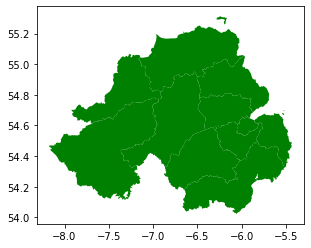

In [8]:
# Plot data only for geopandas.geodataframe.GeoDataFrame
districts.plot(color = 'green')

<AxesSubplot:>

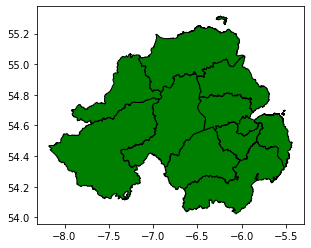

In [9]:
districts.plot(color = 'green', edgecolor ='black')

<AxesSubplot:>

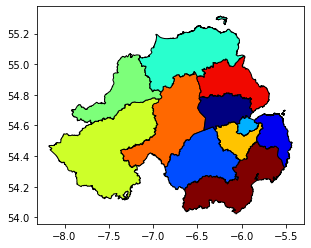

In [10]:
districts.plot(cmap = 'jet', edgecolor ='black', column='district') 
# jet is from matplot but geopandas have it. ex other colours: terrain, turbo...
# https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [11]:
a_i = gpd.read_file(r'C:\Users\34639\wa\jupyter\geopandas\geopandatut\introgeopandas\Shapefiles\area_of_interest.shp')

<AxesSubplot:>

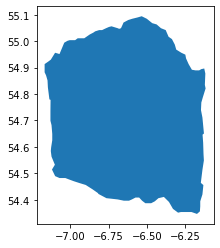

In [12]:
a_i.plot()

In [13]:
#plot the figures side by side
import matplotlib.pyplot as plt

<AxesSubplot:>

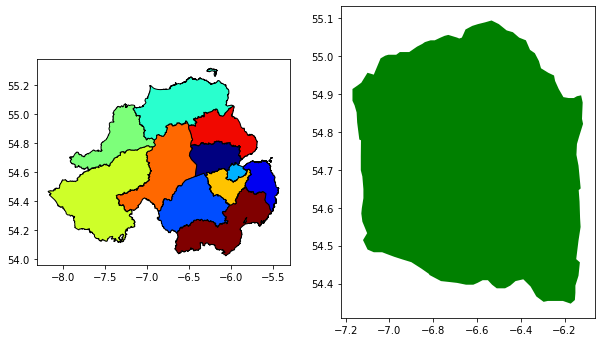

In [14]:
fig, (ax1, ax2) =plt.subplots(ncols =2, figsize =(10,8))
districts.plot(ax = ax1, cmap = 'jet', edgecolor ='black', column='district')
a_i.plot(ax = ax2, color = 'green')

# Plotting multiple layers

In [15]:
atms = gpd.read_file(r'C:\Users\34639\wa\jupyter\geopandas\geopandatut\introgeopandas\Shapefiles\atms.shp')

<AxesSubplot:>

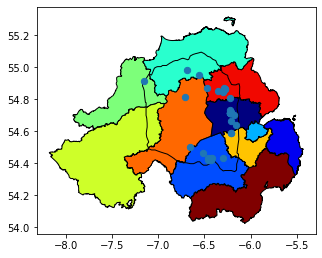

In [16]:
fig, ax = plt.subplots(figsize =(5,5)) #fig, ax
districts.plot(ax = ax, cmap = 'jet', edgecolor ='black', column='district')
a_i.plot(ax = ax, color = 'none', edgecolor ='black')# above
atms.plot(ax = ax, markersize = 40)

In [17]:
atms.head()

,operator,geometry
0,Northern Bank,MULTIPOINT (-6.65841 54.50122)
1,None,MULTIPOINT (-6.22666 54.72956)
2,Bank of Ireland,MULTIPOINT (-6.22038 54.80819)
3,None,MULTIPOINT (-6.29858 54.43323)
4,None,MULTIPOINT (-6.21401 54.59141)


# CRS 

In [18]:
atms.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [19]:
a_i.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

# Reprojectting GeoPandas GeoDataFrames

In [20]:
# to epsg:32629
districts = districts.to_crs(epsg=32629)

<AxesSubplot:>

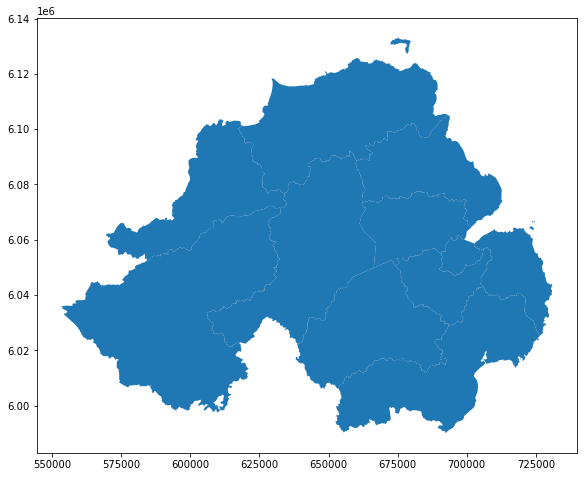

In [21]:
#change the x, y
#units in meters
districts.plot(figsize = (10,8))

In [22]:
a_i=a_i.to_crs(epsg=32629)

<AxesSubplot:>

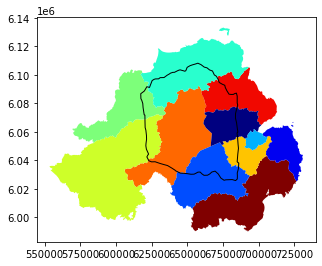

In [23]:
fig, ax = plt.subplots(figsize =(5,5))
districts.plot(ax = ax, cmap = 'jet', column='district')
a_i.plot(ax = ax, color = 'none', edgecolor ='black')# above

# Intersecting layers using geopandas

In [24]:
# intersection
districts_aoi = gpd.overlay(districts, a_i, how='intersection')

<AxesSubplot:>

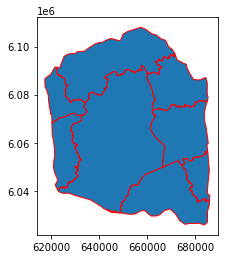

In [25]:
districts_aoi.plot(edgecolor ='red')

# Calculating areas of intersected layers

In [26]:
districts_aoi

,district,Id,geometry
0,Mid Ulster,0,"POLYGON ((658023.630 6091903.404, 658030.243 6..."
1,Mid and East Antrim,0,"POLYGON ((684908.771 6077240.941, 684903.541 6..."
2,Lisburn and Castlereagh,0,"POLYGON ((685894.090 6035737.164, 685891.166 6..."
3,"Armagh City, Banbridge and Craigavon",0,"MULTIPOLYGON (((643174.064 6031990.247, 643202..."
4,Antrim and Newtownabbey,0,"POLYGON ((682239.947 6077405.626, 682246.748 6..."
5,Fermanagh and Omagh,0,"POLYGON ((628751.931 6072158.997, 628755.668 6..."
6,Derry City and Strabane,0,"POLYGON ((622292.384 6091383.856, 622290.858 6..."
7,Causeway Coast and Glens,0,"POLYGON ((671301.064 6097251.878, 671300.557 6..."


In [27]:
districts_aoi.columns

Index(['district', 'Id', 'geometry'], dtype='object')

In [28]:
# create new column wich store the area
districts_aoi['area'] = districts_aoi.area/10000000 #if src is utm area is m2, to km2
districts_aoi.head()

,district,Id,geometry,area
0,Mid Ulster,0,"POLYGON ((658023.630 6091903.404, 658030.243 6...",157.442008
1,Mid and East Antrim,0,"POLYGON ((684908.771 6077240.941, 684903.541 6...",37.369106
2,Lisburn and Castlereagh,0,"POLYGON ((685894.090 6035737.164, 685891.166 6...",15.173787
3,"Armagh City, Banbridge and Craigavon",0,"MULTIPOLYGON (((643174.064 6031990.247, 643202...",55.393282
4,Antrim and Newtownabbey,0,"POLYGON ((682239.947 6077405.626, 682246.748 6...",46.282292


# Exporting Geopandas GeodataFrames into ESRI shapefile

In [29]:
#districts_aoi.to_file('C:/Users/34639/wa/jupyter/geopandas/geopandatut/introgeopandas/results/districts_aoi_results.shp', driver ="ESRI Shapefile" )

# Change index column

In [30]:
districts.head(2)

,district,geometry
0,"Newry, Mourne and Down","POLYGON ((705847.101 6043145.795, 705854.486 6..."
1,Mid Ulster,"POLYGON ((658017.072 6091916.291, 658023.630 6..."


In [33]:
districts.set_index('district', inplace=True)
districts.head()

,geometry
district,
"Newry, Mourne and Down","POLYGON ((705847.101 6043145.795, 705854.486 6..."
Mid Ulster,"POLYGON ((658017.072 6091916.291, 658023.630 6..."
Mid and East Antrim,"POLYGON ((693591.736 6104869.974, 693596.880 6..."
Lisburn and Castlereagh,"POLYGON ((688012.625 6056864.993, 688053.061 6..."
"Armagh City, Banbridge and Craigavon","POLYGON ((676032.651 6048086.094, 676033.306 6..."


### Is better join by indexes